<a href="https://colab.research.google.com/github/milind69/milind69/blob/main/plant_seedlings_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Objective**
You are provided with a dataset of images of plant seedlings at various stages of grown. Each image has a filename that is its unique id. The dataset comprises 12 plant species. The goal of the project is to create a classifier capable of determining a plant's species from a photo.

#### **Dataset:**

The data file names are:

- images.npy - which contains the array of images
- Label.csv  - Lables for each image 


#### Problem Statement
To build a classification model that can take images of seedlings as input and classify them into one of the following types of species:

       - 'Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed',
       
       - 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize',
       
       - 'Scentless Mayweed', 'Shepherds Purse','Small-flowered Cranesbill', 'Sugar beet'


In [1]:
import gc


In [2]:
gc.collect()

59

In [3]:
#Reading the training images from the path and labelling them into the given categories
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import seaborn as sns # for data visualization 
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential #sequential api for sequential model 
from tensorflow.keras.layers import Dense, Dropout, Flatten #importing different layers 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU,Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding 
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam #optimiers for optimizing the model
from tensorflow.keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import losses, optimizers
from sklearn.model_selection import train_test_split
from datetime import datetime
print("Setup Done")

Setup Done


In [4]:
tf.keras.backend.clear_session()

In [5]:
print(datetime.now().isoformat(timespec='minutes'))

2022-02-11T23:24


In [6]:
### uncomment following to run on colab 
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### **Reading the DataSet**

In [7]:
# Read the data file and build image dataset 
# comment/uncomment following as appropriate to run on colab 
images=np.load('/content/drive/MyDrive/Colab Notebooks/images.npy')
plant_seedlings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Labels.csv')
#images=np.load('images.npy')
#plant_seedlings = pd.read_csv('Labels.csv')
labels = plant_seedlings['Label']
# get #of classes
classes = list(np.unique(labels))
num_of_seedlings = len(images)
print("There are %d classes and %d images in the dataset" % (len(classes),len(images)))

There are 12 classes and 4750 images in the dataset


In [8]:
from numpy.random import seed
seed(1)
from tensorflow.random import set_seed
set_seed(2)

In [9]:
print("Indexed list of classes")
_=[print(f'{x} - {classes[x]}') for x in range(len(classes))]


Indexed list of classes
0 - Black-grass
1 - Charlock
2 - Cleavers
3 - Common Chickweed
4 - Common wheat
5 - Fat Hen
6 - Loose Silky-bent
7 - Maize
8 - Scentless Mayweed
9 - Shepherds Purse
10 - Small-flowered Cranesbill
11 - Sugar beet


In [10]:
print("Percent wise distribution of each class")
print("-------------------------------------------")
print("{}".format(plant_seedlings['Label'].value_counts(normalize=True)*100))

Percent wise distribution of each class
-------------------------------------------
Loose Silky-bent             13.768421
Common Chickweed             12.863158
Scentless Mayweed            10.863158
Small-flowered Cranesbill    10.442105
Fat Hen                      10.000000
Charlock                      8.210526
Sugar beet                    8.105263
Cleavers                      6.042105
Black-grass                   5.536842
Shepherds Purse               4.863158
Common wheat                  4.652632
Maize                         4.652632
Name: Label, dtype: float64


In [11]:
print("Count wise distribution of each class")
print("-------------------------------------------")
print("{}".format(plant_seedlings['Label'].value_counts(sort=True)))

Count wise distribution of each class
-------------------------------------------
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
Name: Label, dtype: int64


### Observations:
There is unbalanced distribution of classes, Highest is *Loose Silky-ben*  with 13.76% and lowest is *Maize* with 4.65%

In [12]:
# Build List of List containing HSV image and numberical class value 
seedlings_data = []
#grayhsv_data =[]
scale = 128
for image,label in (list(zip(images,labels))):
  try:  
    image=cv2.resize(image,(scale,scale))
    #grayimg=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    blurr = cv2.GaussianBlur(image,(5,5),0)
    hsv = cv2.cvtColor(blurr,cv2.COLOR_BGR2HSV)
    #grayhsv = cv2.cvtColor(hsv,cv2.COLOR_BGR2GRAY)
    class_num=classes.index(label)
    seedlings_data.append([(image,hsv),class_num])
    #grayhsv_data.append([(grayimg,grayhsv),class_num])
  except:
    pass


### **Exploratory Data Analysis**

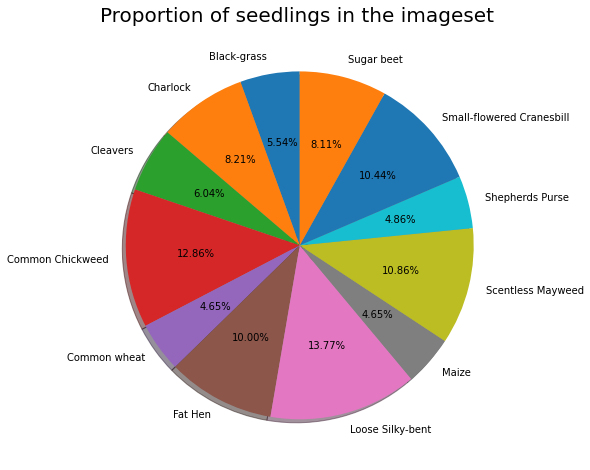

In [13]:
fig1, ax1 = plt.subplots(figsize=(8, 8))
ax1=plt.pie(plant_seedlings['Label'].value_counts().sort_index(), labels=classes,shadow=True, autopct = lambda pct: '{:.2f}%'.format(pct),startangle=90)
plt.title("Proportion of seedlings in the imageset ", size = 20)
plt.show()


#### **Print Random Images from each class**

**Visualize images randomly from each of the three classes**. The Image matrix is plotted and each row represents two 3 channel images corresponding to one class.

In [14]:

imgx_0 = [imgs[0] for imgs,clsnum in seedlings_data if clsnum == 0] 
labelx_0 = classes[0]
imgx_1 = [imgs[0] for imgs,clsnum in seedlings_data if clsnum == 1] 
labelx_1 = classes[1]
imgx_2 = [imgs[0] for imgs,clsnum in seedlings_data if clsnum == 2] 
labelx_2 = classes[2]

imgx_3 = [imgs[0] for imgs,clsnum in seedlings_data if clsnum == 3] 
labelx_3 = classes[3]
imgx_4 = [imgs[0] for imgs,clsnum in seedlings_data if clsnum == 4] 
labelx_4 = classes[4]
imgx_5 = [imgs[0] for imgs,clsnum in seedlings_data if clsnum == 5] 
labelx_5 = classes[5]

imgx_6 = [imgs[0] for imgs,clsnum in seedlings_data if clsnum == 6] 
labelx_6 = classes[6]
imgx_7 = [imgs[0] for imgs,clsnum in seedlings_data if clsnum == 7] 
labelx_7 = classes[7]
imgx_8 = [imgs[0] for imgs,clsnum in seedlings_data if clsnum == 8] 
labelx_8 = classes[8]

imgx_9 = [imgs[0] for imgs,clsnum in seedlings_data if clsnum == 9] 
labelx_9 = classes[9]
imgx_10 = [imgs[0] for imgs,clsnum in seedlings_data if clsnum == 10] 
labelx_10 = classes[10]
imgx_11 = [imgs[0] for imgs,clsnum in seedlings_data if clsnum == 11] 
labelx_11 = classes[11]

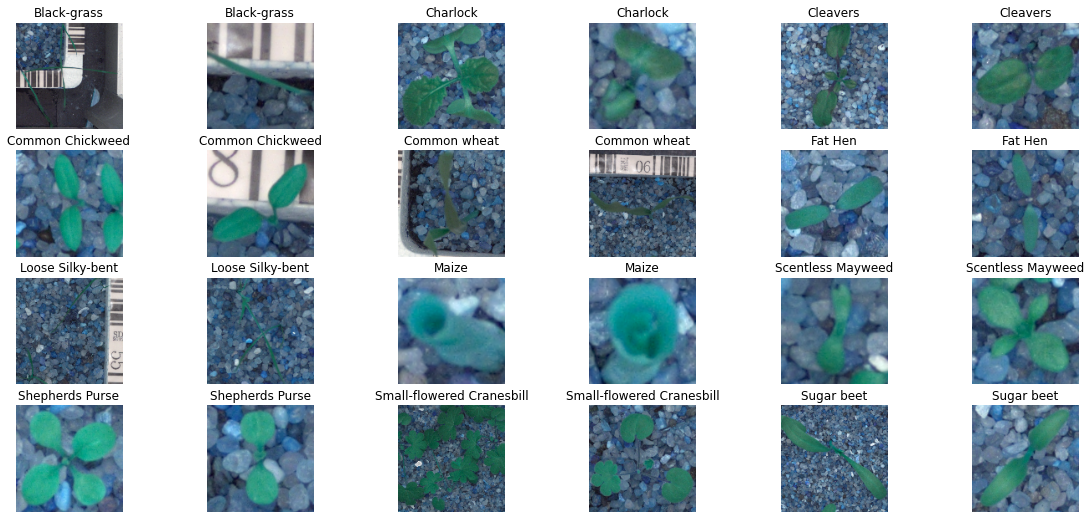

In [15]:
from tensorflow.keras.preprocessing import image
fig = plt.figure(figsize = (20,9))

for count in range(0,2):
    ax = fig.add_subplot(4, 6, count+1)
    fn=image.array_to_img(imgx_0[np.random.randint(0,len(imgx_0))])
    plt.imshow(fn, cmap='gray')
    plt.title(labelx_0)
    plt.axis('off')
    
for count in range(0,2):
    ax = fig.add_subplot(4, 6, count+3)
    fn=image.array_to_img(imgx_1[np.random.randint(0,len(imgx_1))])
    plt.imshow(fn, cmap='gray')
    plt.title(labelx_1)
    plt.axis('off')
    
for count in range(0,2):
    ax = fig.add_subplot(4, 6, count+5)
    fn=image.array_to_img(imgx_2[np.random.randint(0,len(imgx_2))])
    plt.imshow(fn, cmap='gray')
    plt.title(labelx_2)
    plt.axis('off')
    
for count in range(0,2):
    ax = fig.add_subplot(4, 6, count+7)
    fn=image.array_to_img(imgx_3[np.random.randint(0,len(imgx_3))])
    plt.imshow(fn, cmap='gray')
    plt.title(labelx_3)
    plt.axis('off')

for count in range(0,2):
    ax = fig.add_subplot(4, 6, count+9)
    fn=image.array_to_img(imgx_4[np.random.randint(0,len(imgx_4))])
    plt.imshow(fn, cmap='gray')
    plt.title(labelx_4)
    plt.axis('off')
    
for count in range(0,2):
    ax = fig.add_subplot(4, 6, count+11)
    fn=image.array_to_img(imgx_5[np.random.randint(0,len(imgx_5))])
    plt.imshow(fn, cmap='gray')
    plt.title(labelx_5)
    plt.axis('off')
    

for count in range(0,2):
    ax = fig.add_subplot(4, 6, count+13)
    fn=image.array_to_img(imgx_6[np.random.randint(0,len(imgx_6))])
    plt.imshow(fn, cmap='gray')
    plt.title(labelx_6)
    plt.axis('off')

for count in range(0,2):
    ax = fig.add_subplot(4, 6, count+15)
    fn=image.array_to_img(imgx_7[np.random.randint(0,len(imgx_7))])
    plt.imshow(fn, cmap='gray')
    plt.title(labelx_7)
    plt.axis('off')
    
for count in range(0,2):
    ax = fig.add_subplot(4, 6, count+17)
    fn=image.array_to_img(imgx_8[np.random.randint(0,len(imgx_8))])
    plt.imshow(fn, cmap='gray')
    plt.title(labelx_8)
    plt.axis('off')

for count in range(0,2):
    ax = fig.add_subplot(4, 6, count+19)
    fn=image.array_to_img(imgx_9[np.random.randint(0,len(imgx_9))])
    plt.imshow(fn, cmap='gray')
    plt.title(labelx_9)
    plt.axis('off')
    
for count in range(0,2):
    ax = fig.add_subplot(4, 6, count+21)
    fn=image.array_to_img(imgx_10[np.random.randint(0,len(imgx_10))])
    plt.imshow(fn, cmap='gray')
    plt.title(labelx_10)
    plt.axis('off')
    
for count in range(0,2):
    ax = fig.add_subplot(4, 6, count+23)
    fn=image.array_to_img(imgx_11[np.random.randint(0,len(imgx_11))])
    plt.imshow(fn, cmap='gray')
    plt.title(labelx_11)
    plt.axis('off')
plt.show()

#### Image Histogram
- Image Histograms shows the distribution on Pixel/Pixel Intensity in the images
- Histogram of an image provides a global description of the appearance of an image.
- Histogram of an image represents the relative frequency of occurence of various gray levels in an image.

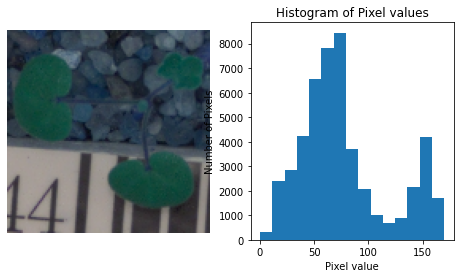

In [16]:
fig = plt.figure(figsize = (8,4))
i=seedlings_data[12][0][0]
fig.add_subplot(1,2,1)
plt.imshow(i)
plt.axis('off')
b=i.flatten()
#plt.figure(figsize=(4,4), edgecolor='red')
fig.add_subplot(1,2,2)
n, bins, patches = plt.hist(b, bins=15)
plt.xlabel('Pixel value')
plt.ylabel('Number of Pixels')
plt.title('Histogram of Pixel values')
plt.show()

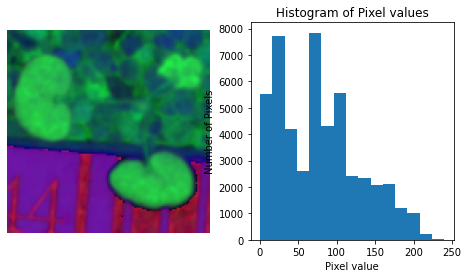

In [17]:
fig = plt.figure(figsize = (8,4))
i=seedlings_data[12][0][1]
fig.add_subplot(1,2,1)
plt.imshow(i)
plt.axis('off')
b=i.flatten()
#plt.figure(figsize=(4,4), edgecolor='red')
fig.add_subplot(1,2,2)
n, bins, patches = plt.hist(b, bins=15)
plt.xlabel('Pixel value')
plt.ylabel('Number of Pixels')
plt.title('Histogram of Pixel values')
plt.show()

#### Observations:
There is case of class imbalance, the % of observations ranges from 13.7% as  high to 4.65% as low , this can bias the prediction towards majority class 

Sample Printing of images shows that the quality of images not very good and need to be cleaned up to remove the noise, which can be achieved by 

- Blurring  the images with Gaussian fliter
- Convert the RGB images into the HSV
- Histogram show higher pixed intensity due to HSV format conversion 
- This may help identify boudries 


**Finding the mean images** for each class of seedlings

In [18]:

s_data = []
IMG_SIZE=128
for image,label in (list(zip(images,labels))):
    class_n = classes.index(label)
    if class_n == 0:
     img_array = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
     new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) 
     
     s_data.append([new_array])


In [19]:
def get_data(class_d):
  sz_data = []
  IMG_SIZE=128
  for image,label in (list(zip(images,labels))):
    class_n = classes.index(label)
    if class_n == class_d:
     img_array = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
     new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) 
     sz_data.append([new_array])
  return sz_data

In [20]:
def find_mean_img(full_mat, title):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    mean_img = mean_img/255
    # reshape it back to a matrix
    #mean_img = mean_img.reshape((128,128,3))
    #plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.imshow(mean_img[0],  cmap='Greys_r')
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()

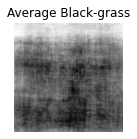

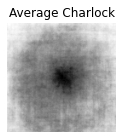

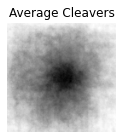

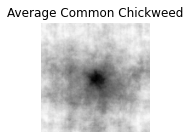

In [21]:
fig=plt.figure(figsize=(2,2))
label_0_data=get_data(0)
find_mean_img(label_0_data, classes[0])

label_1_data=get_data(1)
fig=plt.figure(figsize=(2,2))
find_mean_img(label_1_data, classes[1])

label_2_data=get_data(2)
fig=plt.figure(figsize=(2,2))
find_mean_img(label_2_data, classes[2])

label_3_data=get_data(3)
fig=plt.figure(figsize=(2,2))
find_mean_img(label_3_data, classes[3])

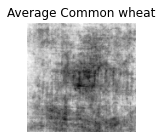

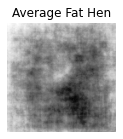

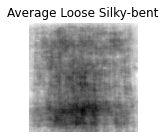

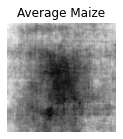

In [22]:
label_4_data=get_data(4)
fig=plt.figure(figsize=(2,2))
find_mean_img(label_4_data, classes[4])

label_5_data=get_data(5)
fig=plt.figure(figsize=(2,2))
find_mean_img(label_5_data, classes[5])

label_6_data=get_data(6)
fig=plt.figure(figsize=(2,2))
find_mean_img(label_6_data, classes[6])

label_7_data=get_data(7)
fig=plt.figure(figsize=(2,2))
find_mean_img(label_7_data, classes[7])

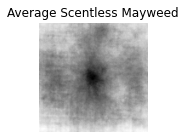

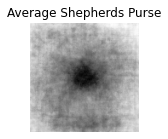

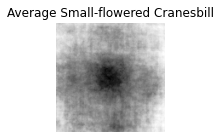

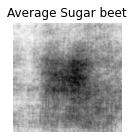

In [23]:
label_8_data=get_data(8)
fig=plt.figure(figsize=(2,2))
find_mean_img(label_8_data, classes[8])

label_9_data=get_data(9)
fig=plt.figure(figsize=(2,2))
find_mean_img(label_9_data, classes[9])

label_10_data=get_data(10)
fig=plt.figure(figsize=(2,2))
find_mean_img(label_10_data, classes[10])

label_11_data=get_data(11)
fig=plt.figure(figsize=(2,2))
find_mean_img(label_11_data, classes[11])

### **Data Preprocessing** 
Create X features(Images) and y lables from the seedlings data, we shuffle it random so we will get mix of images 
As observed the quality of images are very poor and also sample distribution in not proper 


In [24]:
#Create X and y feature sets orgX is original image sets X is blurred normalize hsv sr
X = []
y = []
orgX =[]
np.random.shuffle(seedlings_data)
for features,label in seedlings_data:
#np.random.shuffle(grayhsv_data)
#for features,label in grayhsv_data:
    orgX.append(features[0])
    X.append(features[1])
    y.append(label)
X= np.array(X)
orgX = np.array(orgX)

# Normalizing pixel values  
X = X/255.0  
orgX = orgX/255.0
# image reshaping 
X = X.reshape(-1,128,128,3)
orgX = orgX.reshape(-1,128,128,3)
print(X.shape)
print(orgX.shape)

(4750, 128, 128, 3)
(4750, 128, 128, 3)


In [25]:
# Split the data into train and test data set 
seed=42
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=seed,stratify=y) 
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=seed) 

In [26]:
#convert target to encoded categorical format 
encoded = to_categorical(np.array(y_train))
y_train_e=encoded
encoded_test = to_categorical(np.array(y_test))
y_test_e=encoded_test

In [27]:
print(X_train.shape)
print(X_test.shape)

(4275, 128, 128, 3)
(475, 128, 128, 3)


In [28]:
print(y_train_e.shape)
print(y_test_e.shape)

(4275, 12)
(475, 12)


### **Model Building** 

We will be using two types of Deep Neural Networks:

- **ANN** (Artificial Neural Network - fully connected)
- **CNN** (Convolutional Neural Network)

#### **ANN**

In [29]:
#Build the model
# 3 layers, 1 layer to flatten the image to a 28 x 28 = 784 vector
#           1 layer with 128 neurons and relu function
#           1 layer with 10 neurons and softmax function
#Create the neural network model
def create_model(): 
        model_ann = keras.Sequential([
            keras.layers.Flatten(input_shape=(128,128,3)),
            keras.layers.Dense(500,kernel_initializer='he_uniform', activation=tf.nn.relu),
            keras.layers.Dropout(0.01),
            keras.layers.Dense(700,kernel_initializer='he_uniform', activation=tf.nn.relu),
            keras.layers.Dropout(0.01),
            keras.layers.Dense(12, kernel_initializer='random_uniform',activation=tf.nn.softmax)
        ])
        #Compile the model
        #The loss function measures how well the model did on training , and then tries 
        #to improve on it using the optimizer
        model_ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model_ann

In [30]:
model_ann=create_model()
model_ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 500)               24576500  
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 700)               350700    
                                                                 
 dropout_1 (Dropout)         (None, 700)               0         
                                                                 
 dense_2 (Dense)             (None, 12)                8412      
                                                                 
Total params: 24,935,612
Trainable params: 24,935,612
No

In [31]:
#Train the model
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model_ann.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
history=model_ann.fit(X_train, 
          y_train_e,  #It expects integers because of the sparse_categorical_crossentropy loss function
          epochs=200, #number of iterations over the entire dataset to train on
          batch_size=100,validation_split=0.2,callbacks=[es, mc],use_multiprocessing=True,verbose=1)#number of samples per gradient update for training

Epoch 1/200
35/35 [==============================] - ETA: 0s - loss: 9.7195 - accuracy: 0.1175
Epoch 00001: val_accuracy improved from -inf to 0.17076, saving model to best_model_ann.h5
35/35 [==============================] - 6s 94ms/step - loss: 9.7195 - accuracy: 0.1175 - val_loss: 2.4511 - val_accuracy: 0.1708
Epoch 2/200
35/35 [==============================] - ETA: 0s - loss: 2.3492 - accuracy: 0.1889
Epoch 00002: val_accuracy improved from 0.17076 to 0.28304, saving model to best_model_ann.h5
35/35 [==============================] - 3s 75ms/step - loss: 2.3492 - accuracy: 0.1889 - val_loss: 2.2396 - val_accuracy: 0.2830
Epoch 3/200
35/35 [==============================] - ETA: 0s - loss: 2.0736 - accuracy: 0.2985
Epoch 00003: val_accuracy improved from 0.28304 to 0.28772, saving model to best_model_ann.h5
35/35 [==============================] - 3s 76ms/step - loss: 2.0736 - accuracy: 0.2985 - val_loss: 2.0611 - val_accuracy: 0.2877
Epoch 4/200
34/35 [===========================

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


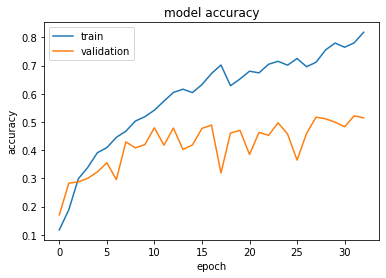

In [32]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [33]:
#Evaluate the model on test Data
model_ann.evaluate(X_test,y_test_e)

15/15 [==============================] - 0s 9ms/step - loss: 1.7765 - accuracy: 0.4989


[1.7764897346496582, 0.4989473819732666]

In [34]:
from tensorflow.keras.models import load_model
model_ann=load_model('best_model_ann.h5')

In [35]:
y_predict=model_ann.predict(X_test)
y_predict = np.argmax(y_predict, axis=1)

In [36]:
from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(y_test,y_predict)
cm

array([[ 5,  0,  0,  0,  1,  1, 15,  0,  0,  0,  2,  2],
       [ 0, 15,  6,  1,  0,  0,  1,  0,  4,  3,  6,  3],
       [ 0,  1, 15,  0,  0,  0,  0,  0,  5,  2,  6,  0],
       [ 1,  0,  0, 38,  0,  1,  2,  4,  7,  2,  1,  5],
       [ 0,  0,  1,  1,  1,  1, 12,  0,  3,  0,  0,  3],
       [ 0,  0,  3,  2,  1, 11, 21,  1,  0,  0,  4,  5],
       [ 2,  0,  0,  1,  0,  0, 56,  0,  1,  1,  1,  3],
       [ 2,  1,  0,  6,  0,  1,  0,  2,  6,  2,  0,  2],
       [ 1,  1,  0,  9,  0,  1,  5,  2, 24,  6,  0,  3],
       [ 0,  0,  0,  3,  0,  0,  0,  0,  3, 12,  4,  1],
       [ 0,  2,  0,  0,  0,  3,  1,  0,  0,  4, 40,  0],
       [ 0,  0,  0,  2,  0,  2, 11,  1,  7,  0,  2, 13]])

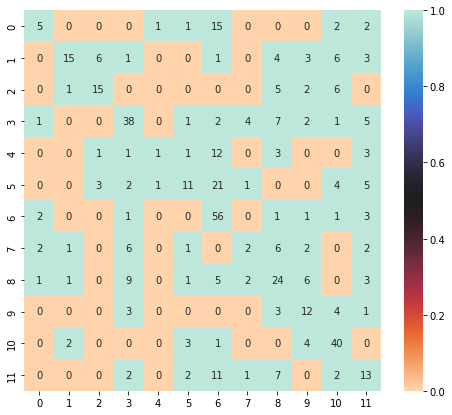

In [37]:
plt.figure(figsize=(8,7))
import seaborn as sns
sns.heatmap(cm, annot=True,vmin=0, vmax=1, cmap='icefire_r')
plt.show()

In [38]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.45      0.19      0.27        26
           1       0.75      0.38      0.51        39
           2       0.60      0.52      0.56        29
           3       0.60      0.62      0.61        61
           4       0.33      0.05      0.08        22
           5       0.52      0.23      0.32        48
           6       0.45      0.86      0.59        65
           7       0.20      0.09      0.13        22
           8       0.40      0.46      0.43        52
           9       0.38      0.52      0.44        23
          10       0.61      0.80      0.69        50
          11       0.33      0.34      0.33        38

    accuracy                           0.49       475
   macro avg       0.47      0.42      0.41       475
weighted avg       0.49      0.49      0.46       475



In [39]:
test_df=pd.DataFrame({"y_test": y_test,
              "y_predict": y_predict
})

In [40]:
test_df.head()

,y_test,y_predict
0,3,7
1,10,10
2,10,10
3,10,5
4,1,11


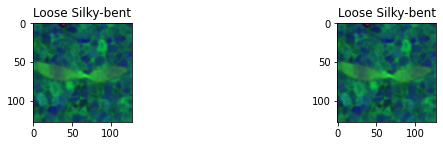

6


In [41]:
fig=plt.figure(figsize=(10,4))
rand_img_num=np.random.randint(1,50)
test_img = test_df.iloc[rand_img_num]
fig.add_subplot(2,2,1)
plt.imshow(X_test[test_img['y_test']])
plt.title(classes[test_img['y_test']])
fig.add_subplot(2,2,2)
plt.imshow(X_test[test_img['y_predict']])
plt.title(classes[test_img['y_predict']])
plt.show()
print(test_img['y_test'])

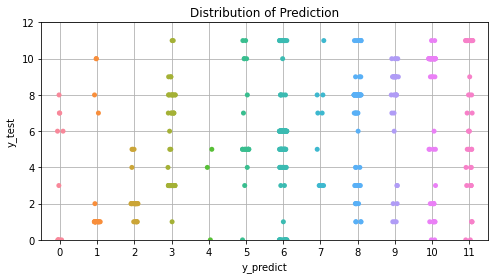

In [42]:
plt.figure(figsize=(8,4))
ax=sns.stripplot(data=test_df,y='y_test', x='y_predict', jitter=True)
plt.title("Distribution of Prediction")
plt.ylim(0,12)
plt.grid(True)

As we see here, the **ANN does not show a good accuracy on test set**. ANNs are unable to capture correlation characteristics of the image. Some overfitting is happening
The Precision , Acuraccy as well F1 score is very poor. 
The striplot as well heatmap show high number of wrong classification 

**Let's try Convolutional Neural Networks, which take in the whole image as a 2D matrix instead.**

In [43]:
gc.collect()


82557

In [44]:
tf.keras.backend.clear_session()

### **CNN**

**CNN with Dropout - Model 1**

CNN models are prone to overfitting due to large number feature maps temd to overfit neural network
Dropout, EarlyStopping are populer and powerful menthod of reduce the overfitting. In dropout,some proporting in one or more layers some units are dropped at random, making it as unique dataset in the batch.


In [45]:
model_cnn_d = Sequential()
#

model_cnn_d.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (128,128,3)))
model_cnn_d.add(MaxPool2D(pool_size=(2,2)))
model_cnn_d.add(Dropout(0.25))
#
model_cnn_d.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model_cnn_d.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model_cnn_d.add(Dropout(0.25))
#
model_cnn_d.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model_cnn_d.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model_cnn_d.add(Dropout(0.3))
#
model_cnn_d.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', activation ='relu'))
model_cnn_d.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model_cnn_d.add(Dropout(0.3))

#
model_cnn_d.add(Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same', activation ='relu'))
model_cnn_d.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model_cnn_d.add(Dropout(0.3))

# 
model_cnn_d.add(Flatten())
model_cnn_d.add(Dense(1024, activation = "relu"))
model_cnn_d.add(Dropout(0.5))
model_cnn_d.add(Dense(12, activation = "softmax"))
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model_cnn_d.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
epochs = 200  
batch_size = 64



es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=7)
mc = ModelCheckpoint('best_model_cnn_d.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history_cnn_d=model_cnn_d.fit(X_train, 
          y_train_e,  #It expects integers because of the sparse_categorical_crossentropy loss function
          epochs=30, #number of iterations over the entire dataset to train on
          batch_size=64,validation_split=0.20,callbacks=[es, mc],use_multiprocessing=True,verbose=1)#number of samples per gradient update for training  


Epoch 1/30
54/54 [==============================] - ETA: 0s - loss: 2.4186 - accuracy: 0.1482
Epoch 00001: val_accuracy improved from -inf to 0.21287, saving model to best_model_cnn_d.h5
54/54 [==============================] - 20s 195ms/step - loss: 2.4186 - accuracy: 0.1482 - val_loss: 2.3071 - val_accuracy: 0.2129
Epoch 2/30
54/54 [==============================] - ETA: 0s - loss: 2.0777 - accuracy: 0.2962
Epoch 00002: val_accuracy improved from 0.21287 to 0.34737, saving model to best_model_cnn_d.h5
54/54 [==============================] - 8s 153ms/step - loss: 2.0777 - accuracy: 0.2962 - val_loss: 1.9063 - val_accuracy: 0.3474
Epoch 3/30
54/54 [==============================] - ETA: 0s - loss: 1.7080 - accuracy: 0.4102
Epoch 00003: val_accuracy did not improve from 0.34737
54/54 [==============================] - 8s 150ms/step - loss: 1.7080 - accuracy: 0.4102 - val_loss: 2.0108 - val_accuracy: 0.2538
Epoch 4/30
54/54 [==============================] - ETA: 0s - loss: 1.5775 - acc

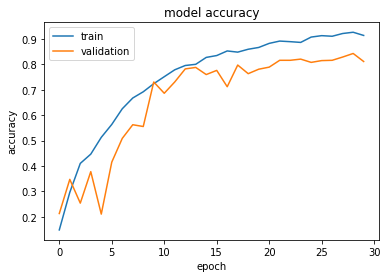

In [46]:
# summarize history for accuracy
plt.plot(history_cnn_d.history['accuracy'])
plt.plot(history_cnn_d.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [47]:
from tensorflow.keras.models import load_model
model_cnn_d=load_model('best_model_cnn_d.h5')

In [48]:
#Evaluate the model on test Data
model_cnn_d.evaluate(X_test,y_test_e)

15/15 [==============================] - 2s 68ms/step - loss: 0.7027 - accuracy: 0.8211


[0.7026768326759338, 0.821052610874176]

In [49]:
y_predict=model_cnn_d.predict(X_test)
y_predict = np.argmax(y_predict, axis=1)

In [50]:
cm=confusion_matrix(y_test,y_predict)
cm

array([[ 7,  0,  0,  0,  1,  3, 15,  0,  0,  0,  0,  0],
       [ 0, 32,  3,  0,  0,  3,  0,  0,  1,  0,  0,  0],
       [ 0,  0, 27,  0,  0,  0,  0,  0,  2,  0,  0,  0],
       [ 0,  0,  0, 52,  1,  2,  0,  2,  0,  3,  1,  0],
       [ 0,  0,  0,  0, 16,  1,  2,  1,  2,  0,  0,  0],
       [ 0,  0,  1,  0,  0, 45,  2,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  1, 60,  0,  1,  0,  0,  1],
       [ 0,  1,  2,  1,  0,  2,  1, 13,  1,  0,  0,  1],
       [ 0,  0,  1,  1,  0,  1,  1,  0, 43,  5,  0,  0],
       [ 0,  1,  0,  2,  0,  0,  0,  0,  1, 19,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  1,  0,  1,  0, 46,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  1,  5,  0,  0, 30]])

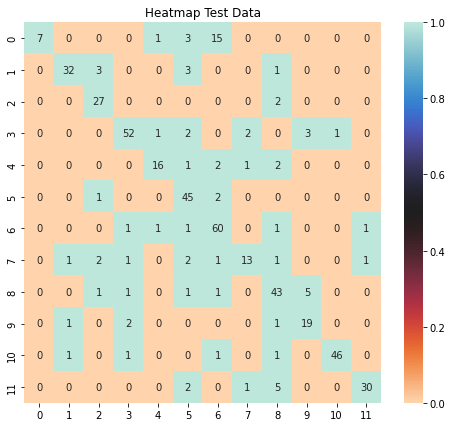

In [51]:
plt.figure(figsize=(8,7))
plt.title("Heatmap Test Data")
import seaborn as sns
sns.heatmap(cm, annot=True,vmin=0, vmax=1, cmap='icefire_r')
plt.show()

In [52]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.27      0.42        26
           1       0.91      0.82      0.86        39
           2       0.79      0.93      0.86        29
           3       0.90      0.85      0.87        61
           4       0.84      0.73      0.78        22
           5       0.75      0.94      0.83        48
           6       0.73      0.92      0.82        65
           7       0.76      0.59      0.67        22
           8       0.75      0.83      0.79        52
           9       0.70      0.83      0.76        23
          10       0.98      0.92      0.95        50
          11       0.94      0.79      0.86        38

    accuracy                           0.82       475
   macro avg       0.84      0.78      0.79       475
weighted avg       0.84      0.82      0.81       475



In [53]:
test_df_cnn_d=pd.DataFrame({"y_test": y_test,
              "y_predict": y_predict
})
test_df_cnn_d.head(10)

,y_test,y_predict
0,3,4
1,10,10
2,10,10
3,10,8
4,1,1
5,10,10
6,11,11
7,6,6
8,10,3
9,10,10


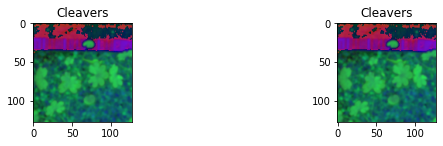

2


In [54]:
fig=plt.figure(figsize=(10,4))
rand_img_num=np.random.randint(1,50)
test_img = test_df_cnn_d.iloc[rand_img_num]
fig.add_subplot(2,2,1)
plt.imshow(X_test[test_img['y_test']])
plt.title(classes[test_img['y_test']])
fig.add_subplot(2,2,2)
plt.imshow(X_test[test_img['y_predict']])
plt.title(classes[test_img['y_predict']])
plt.show()
print(test_img['y_test'])

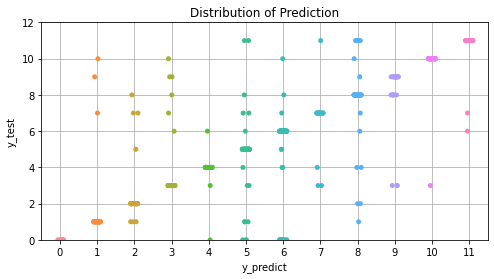

In [55]:
plt.figure(figsize=(8,4))
ax=sns.stripplot(data=test_df_cnn_d,y='y_test', x='y_predict', jitter=True)
plt.title("Distribution of Prediction")
plt.ylim(0,12)
plt.grid(True)

### Observations:
- After introducing the Dropout the model performace on test set has increased from 46% to 82% 
- Recall , F1 has improved for most of the classes but class 0 still show high number of False Negative, it may be due to poor image quality 
- The stripplot and Heatmap show improvement in classfication over ANNs 


In [56]:
gc.collect()

23904

In [57]:
tf.keras.backend.clear_session()

**CNN with Dropout and BatchNormalization - Model 2**

Batch Normalization – commonly abbreviated as Batch Norm – is one of these methods. Currently, it is a widely used technique in the field of Deep Learning. It improves the learning speed of Neural Networks and provides regularization, avoiding overfitting.

Batch Norm is a normalization technique done between the layers of a Neural Network instead of in the raw data. It is done along mini-batches instead of the full data set. It serves to speed up training and use higher learning rates, making learning easier.

In [58]:


model_cnn_db = Sequential()
#
model_cnn_db.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (128,128,3)))
model_cnn_db.add(MaxPool2D(pool_size=(2,2)))
#model_cnn_db.add(BatchNormalization(axis=3))
model_cnn_db.add(Dropout(0.25))
#
#model_cnn_db.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model_cnn_db.add(Conv2D(filters = 128, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model_cnn_db.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
#model_cnn_db.add(BatchNormalization(axis=3))
model_cnn_db.add(Dropout(0.25))
#
#model_cnn_db.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model_cnn_db.add(Conv2D(filters = 128, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model_cnn_db.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model_cnn_db.add(BatchNormalization(axis=3))
model_cnn_db.add(Dropout(0.3))
#
#model_cnn_db.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same',  activation ='relu'))  
model_cnn_db.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',  activation ='relu'))                 
model_cnn_db.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
#model.add(BatchNormalization(axis=3))
model_cnn_db.add(Dropout(0.3))

#
#model.add(Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same',  activation ='relu'))
model_cnn_db.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same',  activation ='relu'))
model_cnn_db.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model_cnn_db.add(BatchNormalization(axis=3))

# 
model_cnn_db.add(Flatten())
model_cnn_db.add(Dense(1024, activation = "relu"))
#model_cnn_db.add(Dropout(0.5))
model_cnn_db.add(Dense(12, activation = "softmax"))
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model_cnn_db.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
epochs = 200  
batch_size = 64



es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=7)
mc = ModelCheckpoint('best_model_db.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True,)
lrr = ReduceLROnPlateau(monitor='val_loss',  patience=3, verbose=1, factor=0.4, min_lr=0.00001)
lrr1 = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.1)

history_cnn_db=model_cnn_db.fit(X_train, 
          y_train_e,  #It expects integers because of the sparse_categorical_crossentropy loss function
          epochs=30, #number of iterations over the entire dataset to train on
          batch_size=64,
          validation_split=0.20,callbacks=[es, mc,],use_multiprocessing=True,verbose=1)#number of samples per gradient update for training  


Epoch 1/30
54/54 [==============================] - ETA: 0s - loss: 2.1190 - accuracy: 0.3368
Epoch 00001: val_accuracy improved from -inf to 0.23392, saving model to best_model_db.h5
54/54 [==============================] - 17s 234ms/step - loss: 2.1190 - accuracy: 0.3368 - val_loss: 2.3192 - val_accuracy: 0.2339
Epoch 2/30
54/54 [==============================] - ETA: 0s - loss: 1.3391 - accuracy: 0.5357
Epoch 00002: val_accuracy did not improve from 0.23392
54/54 [==============================] - 10s 180ms/step - loss: 1.3391 - accuracy: 0.5357 - val_loss: 4.8026 - val_accuracy: 0.1977
Epoch 3/30
54/54 [==============================] - ETA: 0s - loss: 0.9313 - accuracy: 0.6822
Epoch 00003: val_accuracy did not improve from 0.23392
54/54 [==============================] - 10s 179ms/step - loss: 0.9313 - accuracy: 0.6822 - val_loss: 5.9068 - val_accuracy: 0.1626
Epoch 4/30
54/54 [==============================] - ETA: 0s - loss: 0.6398 - accuracy: 0.7702
Epoch 00004: val_accuracy di

In [59]:
model_cnn_db.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 128)       204928    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 128)       0

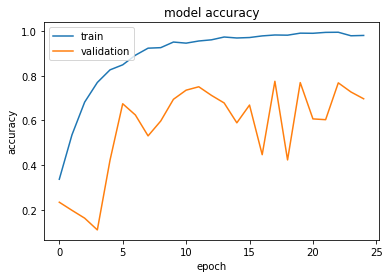

In [60]:

# summarize history for accuracy
plt.plot(history_cnn_db.history['accuracy'])
plt.plot(history_cnn_db.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [61]:
from tensorflow.keras.models import load_model
model_cnn_db=load_model('best_model_db.h5')

In [62]:
#Evaluate the model on test Data
model_cnn_db.evaluate(X_test,y_test_e)

15/15 [==============================] - 3s 96ms/step - loss: 1.1329 - accuracy: 0.7684


[1.1328951120376587, 0.7684210538864136]

In [63]:
y_predict = model_cnn_db.predict(X_test)
y_predict = np.argmax(y_predict, axis=1)

In [64]:
cm=confusion_matrix(y_test,y_predict)
cm

array([[ 6,  0,  0,  0,  4,  3, 11,  0,  1,  0,  1,  0],
       [ 0, 29,  4,  0,  0,  2,  0,  0,  3,  0,  0,  1],
       [ 0,  0, 29,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 48,  1,  0,  0,  1,  9,  1,  1,  0],
       [ 2,  0,  0,  1, 16,  1,  0,  0,  1,  1,  0,  0],
       [ 0,  0,  0,  0,  1, 40,  2,  0,  3,  0,  0,  2],
       [ 7,  0,  0,  1,  5,  1, 46,  0,  2,  0,  1,  2],
       [ 0,  0,  0,  0,  0,  2,  1, 13,  3,  1,  0,  2],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 46,  3,  0,  2],
       [ 0,  0,  0,  1,  0,  1,  0,  1,  4, 15,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  3,  1,  1, 44,  0],
       [ 0,  1,  0,  0,  0,  0,  1,  0,  1,  1,  1, 33]])

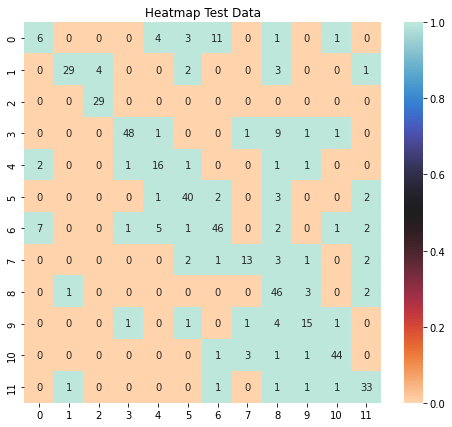

In [65]:
plt.figure(figsize=(8,7))
plt.title("Heatmap Test Data")
import seaborn as sns
sns.heatmap(cm, annot=True,vmin=0, vmax=1, cmap='icefire_r')
plt.show()

In [66]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.40      0.23      0.29        26
           1       0.94      0.74      0.83        39
           2       0.88      1.00      0.94        29
           3       0.94      0.79      0.86        61
           4       0.59      0.73      0.65        22
           5       0.80      0.83      0.82        48
           6       0.74      0.71      0.72        65
           7       0.72      0.59      0.65        22
           8       0.62      0.88      0.73        52
           9       0.65      0.65      0.65        23
          10       0.90      0.88      0.89        50
          11       0.79      0.87      0.82        38

    accuracy                           0.77       475
   macro avg       0.75      0.74      0.74       475
weighted avg       0.77      0.77      0.76       475



In [67]:
test_df_db=pd.DataFrame({"y_test": y_test,
              "y_predict": y_predict
})
test_df_db.head(10)

,y_test,y_predict
0,3,4
1,10,10
2,10,7
3,10,8
4,1,11
5,10,10
6,11,11
7,6,0
8,10,7
9,10,10


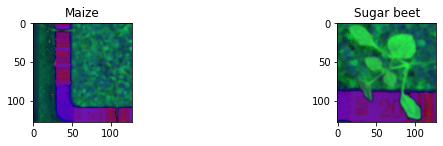

7


In [68]:
fig=plt.figure(figsize=(10,4))
rand_img_num=np.random.randint(1,50)
test_img = test_df_db.iloc[rand_img_num]
fig.add_subplot(2,2,1)
plt.imshow(X_test[test_img['y_test']])
plt.title(classes[test_img['y_test']])
fig.add_subplot(2,2,2)
plt.imshow(X_test[test_img['y_predict']])
plt.title(classes[test_img['y_predict']])
plt.show()
print(test_img['y_test'])

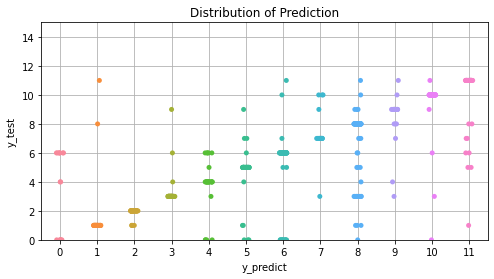

In [69]:
plt.figure(figsize=(8,4))
ax=sns.stripplot(data=test_df_db,y='y_test', x='y_predict', jitter=True, dodge=True)
#ax=sns.violinplot(data=test_df_db,y='y_test', x='y_predict', jitter=True, dodge=True)
plt.title("Distribution of Prediction")
plt.ylim(0,15)
plt.grid(True)

### Observations:

- After introducing the BatchNormalization with Dropout the Model performance show drop from only dropout, performance dropped from 82% to 77%
- Recall , F1 has improved for most of the classes 
- The stripplot and Heatmap show improvement in classfication 


In [70]:
gc.collect()

23727

In [71]:
tf.keras.backend.clear_session()

**CNN with Dropout and Data Agumenation - Model 3**

SomeTime the CNN model do not perform well if it does not have enough training data. Image Augumentation is a way to preprocess the images by adding noise. Many case CNN will perform better when noise added 

When training the Neural Network we can add noise to the observtions by randomely transformrning the images in various ways such as rotating. flipping streching


In [72]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [73]:
X_train_dg=X_train.copy()

In [74]:
X_train_dg.shape

(4275, 128, 128, 3)

In [75]:
train_datagen = ImageDataGenerator(rotation_range = 180,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip = True,width_shift_range = 0.1,height_shift_range = 0.1)


In [76]:
train_datagen.fit(X_train_dg)

In [77]:
model_cnn_da = Sequential()
#

model_cnn_da.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (128,128,3)))
model_cnn_da.add(MaxPool2D(pool_size=(2,2)))
model_cnn_da.add(Dropout(0.25))
#
model_cnn_da.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model_cnn_da.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model_cnn_da.add(Dropout(0.25))
#
model_cnn_da.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model_cnn_da.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model_cnn_da.add(Dropout(0.3))
#
model_cnn_da.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', activation ='relu'))
model_cnn_da.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model_cnn_da.add(Dropout(0.3))

#
model_cnn_da.add(Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same', activation ='relu'))
model_cnn_da.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model_cnn_da.add(Dropout(0.3))

# 
model_cnn_da.add(Flatten())
model_cnn_da.add(Dense(1024, activation = "relu"))
model_cnn_da.add(Dropout(0.5))
model_cnn_da.add(Dense(12, activation = "softmax"))
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model_cnn_da.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
epochs = 200  
batch_size = 64



es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=7)
mc = ModelCheckpoint('best_model_da.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history_cnn_da=model_cnn_da.fit(X_train_dg, 
          y_train_e,  #It expects integers because of the sparse_categorical_crossentropy loss function
          epochs=30, #number of iterations over the entire dataset to train on
          batch_size=64,validation_split=0.20,callbacks=[es, mc],use_multiprocessing=True,verbose=1)#number of samples per gradient update for training  

Epoch 1/30
54/54 [==============================] - ETA: 0s - loss: 2.4263 - accuracy: 0.1278
Epoch 00001: val_accuracy improved from -inf to 0.19883, saving model to best_model_da.h5
54/54 [==============================] - 10s 163ms/step - loss: 2.4263 - accuracy: 0.1278 - val_loss: 2.3092 - val_accuracy: 0.1988
Epoch 2/30
54/54 [==============================] - ETA: 0s - loss: 2.0998 - accuracy: 0.2892
Epoch 00002: val_accuracy improved from 0.19883 to 0.41754, saving model to best_model_da.h5
54/54 [==============================] - 8s 152ms/step - loss: 2.0998 - accuracy: 0.2892 - val_loss: 1.8315 - val_accuracy: 0.4175
Epoch 3/30
54/54 [==============================] - ETA: 0s - loss: 1.7298 - accuracy: 0.3889
Epoch 00003: val_accuracy did not improve from 0.41754
54/54 [==============================] - 8s 148ms/step - loss: 1.7298 - accuracy: 0.3889 - val_loss: 1.8877 - val_accuracy: 0.3123
Epoch 4/30
54/54 [==============================] - ETA: 0s - loss: 1.5727 - accuracy:

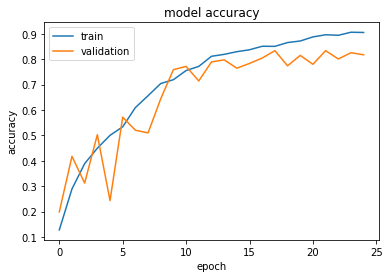

In [78]:
# summarize history for accuracy
plt.plot(history_cnn_da.history['accuracy'])
plt.plot(history_cnn_da.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [79]:
from tensorflow.keras.models import load_model
model_cnn_da=load_model('best_model_da.h5')

In [80]:
#Evaluate the model on test Data
model_cnn_da.evaluate(X_test,y_test_e)

15/15 [==============================] - 1s 31ms/step - loss: 0.6625 - accuracy: 0.8063


[0.6625303030014038, 0.8063157796859741]

In [81]:
y_predict = model_cnn_da.predict(X_test)
y_predict = np.argmax(y_predict, axis=1)

In [82]:
cm=confusion_matrix(y_test,y_predict)
cm

array([[ 6,  0,  0,  0,  2,  1, 17,  0,  0,  0,  0,  0],
       [ 0, 31,  3,  0,  0,  2,  0,  0,  2,  1,  0,  0],
       [ 0,  0, 28,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 52,  1,  0,  0,  5,  2,  0,  1,  0],
       [ 0,  0,  0,  1, 16,  1,  1,  1,  2,  0,  0,  0],
       [ 0,  0,  2,  0,  0, 42,  3,  0,  1,  0,  0,  0],
       [ 2,  0,  0,  1,  0,  0, 57,  2,  2,  0,  0,  1],
       [ 0,  0,  2,  1,  0,  1,  1, 13,  0,  0,  0,  4],
       [ 0,  0,  0,  1,  0,  1,  0,  1, 46,  3,  0,  0],
       [ 0,  0,  0,  4,  0,  1,  0,  1,  1, 16,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  1,  1,  1,  1, 45,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  1,  4,  0,  1, 31]])

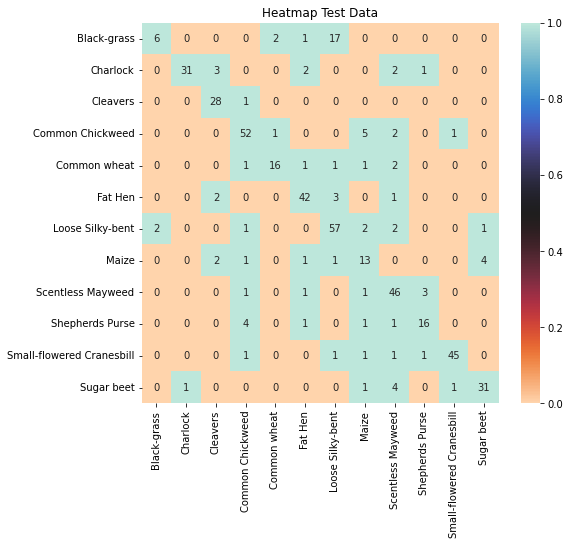

In [83]:
plt.figure(figsize=(8,7))
plt.title("Heatmap Test Data")
import seaborn as sns
sns.heatmap(cm, annot=True,vmin=0, vmax=1, cmap='icefire_r',xticklabels=classes, yticklabels=classes)
plt.show()

In [84]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.75      0.23      0.35        26
           1       0.97      0.79      0.87        39
           2       0.80      0.97      0.88        29
           3       0.84      0.85      0.85        61
           4       0.84      0.73      0.78        22
           5       0.86      0.88      0.87        48
           6       0.71      0.88      0.79        65
           7       0.52      0.59      0.55        22
           8       0.75      0.88      0.81        52
           9       0.76      0.70      0.73        23
          10       0.96      0.90      0.93        50
          11       0.86      0.82      0.84        38

    accuracy                           0.81       475
   macro avg       0.80      0.77      0.77       475
weighted avg       0.81      0.81      0.80       475



In [85]:
test_df_da=pd.DataFrame({"y_test": y_test,
              "y_predict": y_predict
})
test_df_da.head(10)

,y_test,y_predict
0,3,4
1,10,10
2,10,3
3,10,8
4,1,1
5,10,10
6,11,11
7,6,6
8,10,7
9,10,10


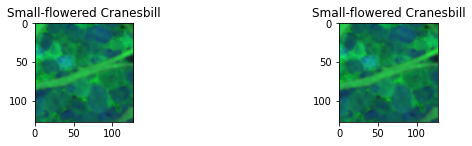

10


In [86]:
fig=plt.figure(figsize=(10,4))
rand_img_num=np.random.randint(1,50)
test_img = test_df_da.iloc[rand_img_num]
fig.add_subplot(2,2,1)
plt.imshow(X_test[test_img['y_test']])
plt.title(classes[test_img['y_test']])
fig.add_subplot(2,2,2)
plt.imshow(X_test[test_img['y_predict']])
plt.title(classes[test_img['y_predict']])
plt.show()
print(test_img['y_test'])

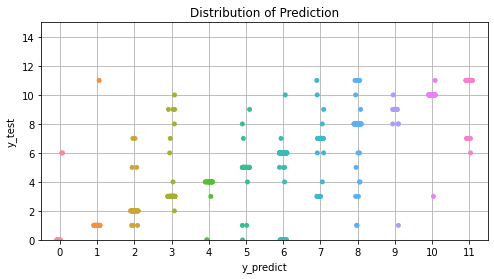

In [87]:
plt.figure(figsize=(8,4))
ax=sns.stripplot(data=test_df_da,y='y_test', x='y_predict', jitter=True, dodge=True)
#ax=sns.violinplot(data=test_df_da,y='y_test', x='y_predict', jitter=True, dodge=True)
plt.title("Distribution of Prediction")
plt.ylim(0,15)
plt.grid(True)

#### Observations:

- The CNN model with Image Agumenation perform better than any other model. Here too the model even though show lower Accuracy score but in term of Recall and F1 it performed better that other models 

- The stripplot and Heatmap show improvement in classification compared to other models too

In [88]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=np.array(y_train))
class_weights = dict(enumerate(class_weights))

#print(f'Class weights for class 0  is {class_weights[0]} and class 1 is {class_weights[1]}')

### Model Performance Evaluation

- Unfortunately, we cannot decide the best model based on only test accuracy here so we are more concerned with Precision and Recall. Since these two metrics are both quite important in this scenario, we will also check the F1 score to try to achieve a good balance between Precision and Recall.

- As we can see, Model 2 and Model 3 seem to be generalizing well because they both have a good Holdout set Accuracy. Let us compute the confusion matrix for these two models to understand the distribution of True Positives, False Positives, False Negatives and True Negatives.

Reload saved CNN best models, we can use these models get perf results and compare 

   **CNN model 1**

In [89]:
from tensorflow.keras.models import load_model

In [90]:
# Load CNN with Dropout
model_cnn_d=load_model('best_model_cnn_d.h5')
y_predict_cnn_d=model_cnn_d.predict(X_test)
y_predict_cnn_d = np.argmax(y_predict_cnn_d, axis=1)

In [91]:
#Evaluate the model on test Data
model_cnn_d.evaluate(X_test,y_test_e)

15/15 [==============================] - 1s 28ms/step - loss: 0.7027 - accuracy: 0.8211


[0.7026768326759338, 0.821052610874176]

   **CNN model 2**

In [92]:
# Load CNN with Dropout and batch norm
model_cnn_db=load_model('best_model_db.h5')
y_predict_cnn_db = model_cnn_db.predict(X_test)
y_predict_cnn_db = np.argmax(y_predict_cnn_db, axis=1)

In [93]:
#Evaluate the model on test Data
model_cnn_db.evaluate(X_test,y_test_e)

15/15 [==============================] - 1s 35ms/step - loss: 1.1329 - accuracy: 0.7684


[1.1328951120376587, 0.7684210538864136]

  **CNN model 3**

In [94]:
# Load CNN with Droout and Image Agumentation
model_cnn_da=load_model('best_model_da.h5')
y_predict_cnn_da = model_cnn_da.predict(X_test)
y_predict_cnn_da = np.argmax(y_predict_cnn_da, axis=1)

In [95]:
#Evaluate the model on test Data
model_cnn_da.evaluate(X_test,y_test_e)

15/15 [==============================] - 1s 28ms/step - loss: 0.6625 - accuracy: 0.8063


[0.6625303030014038, 0.8063157796859741]

#### All the three models may have performed almost equal with Model 2 slightly less , In case of classification we can not rely only on **Accuracy** Metrics. We can compare **Recall and F1 score** for additional insights 

### **Calculating Precision and Recall Score** 

In [96]:
from sklearn.metrics import classification_report
print("Classification score for each class in model 1")
print(classification_report(y_test,y_predict_cnn_d))

Classification score for each class in model 1
              precision    recall  f1-score   support

           0       1.00      0.27      0.42        26
           1       0.91      0.82      0.86        39
           2       0.79      0.93      0.86        29
           3       0.90      0.85      0.87        61
           4       0.84      0.73      0.78        22
           5       0.75      0.94      0.83        48
           6       0.73      0.92      0.82        65
           7       0.76      0.59      0.67        22
           8       0.75      0.83      0.79        52
           9       0.70      0.83      0.76        23
          10       0.98      0.92      0.95        50
          11       0.94      0.79      0.86        38

    accuracy                           0.82       475
   macro avg       0.84      0.78      0.79       475
weighted avg       0.84      0.82      0.81       475



#### Model 1: Except Class 0, recall and f1-score is better for rest of the classes, Accurarcy is highest 

In [97]:
print("Classification score for each class in model 2")
print(classification_report(y_test,y_predict_cnn_db))

Classification score for each class in model 2
              precision    recall  f1-score   support

           0       0.40      0.23      0.29        26
           1       0.94      0.74      0.83        39
           2       0.88      1.00      0.94        29
           3       0.94      0.79      0.86        61
           4       0.59      0.73      0.65        22
           5       0.80      0.83      0.82        48
           6       0.74      0.71      0.72        65
           7       0.72      0.59      0.65        22
           8       0.62      0.88      0.73        52
           9       0.65      0.65      0.65        23
          10       0.90      0.88      0.89        50
          11       0.79      0.87      0.82        38

    accuracy                           0.77       475
   macro avg       0.75      0.74      0.74       475
weighted avg       0.77      0.77      0.76       475



#### Model 2: Class 0 recall and f1-score has improved but dropped for rest of the classes , Accuracy Dropped too

In [98]:
print("Classification score for each class in model 3")
print(classification_report(y_test,y_predict_cnn_da))

Classification score for each class in model 3
              precision    recall  f1-score   support

           0       0.75      0.23      0.35        26
           1       0.97      0.79      0.87        39
           2       0.80      0.97      0.88        29
           3       0.84      0.85      0.85        61
           4       0.84      0.73      0.78        22
           5       0.86      0.88      0.87        48
           6       0.71      0.88      0.79        65
           7       0.52      0.59      0.55        22
           8       0.75      0.88      0.81        52
           9       0.76      0.70      0.73        23
          10       0.96      0.90      0.93        50
          11       0.86      0.82      0.84        38

    accuracy                           0.81       475
   macro avg       0.80      0.77      0.77       475
weighted avg       0.81      0.81      0.80       475



#### Model 3: Slight increse in performance,Multiple runs of this model show this is one  of the better model

### **Plotting the confusion matrix and HeatMaps** 

In [99]:
from sklearn.metrics import confusion_matrix
cm_cnn_d = confusion_matrix(y_test, y_predict_cnn_d)
cm_cnn_db = confusion_matrix(y_test, y_predict_cnn_db)
cm_cnn_da = confusion_matrix(y_test, y_predict_cnn_da)

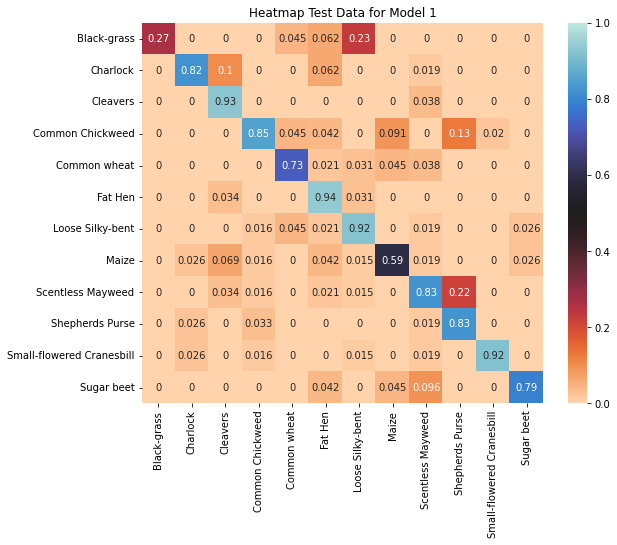

In [100]:
plt.figure(figsize=(9,7))
plt.title("Heatmap Test Data for Model 1")
import seaborn as sns
sns.heatmap(cm_cnn_d/np.sum(cm_cnn_d,axis=1), annot=True,vmin=0, vmax=1, cmap='icefire_r',xticklabels=classes, yticklabels=classes)
plt.show()

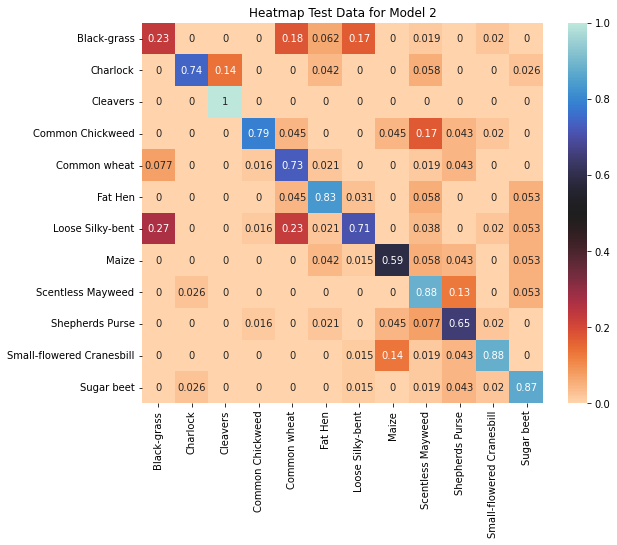

In [102]:
plt.figure(figsize=(9,7))
plt.title("Heatmap Test Data for Model 2")
import seaborn as sns
sns.heatmap(cm_cnn_db/np.sum(cm_cnn_db,axis=1), annot=True,vmin=0, vmax=1, cmap='icefire_r',xticklabels=classes, yticklabels=classes)
plt.show()

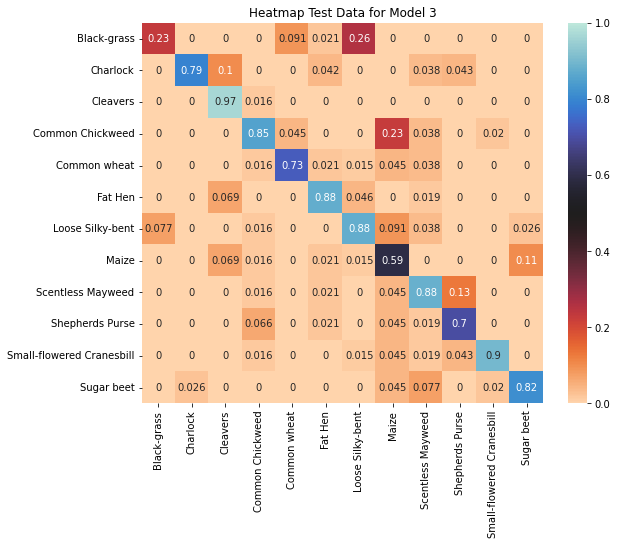

In [103]:
plt.figure(figsize=(9,7))
plt.title("Heatmap Test Data for Model 3")
import seaborn as sns
sns.heatmap(cm_cnn_da/np.sum(cm_cnn_da,axis=1), annot=True,vmin=0, vmax=1, cmap='icefire_r',xticklabels=classes, yticklabels=classes)
plt.show()

### Final Conclusion and Takeway:

**Model 1 (Best) Observation**

As we see from the precision for each class, except class 0 is higher. Most of the cases The Class 0 **Black-Grass** is classified as class 6 **Loose Silky-bent** due to similaties and quality of photographs 

which shows that our model does not do well in identifying Black-Grass. But it is works well for the other samples. 

#### Random sample prediction using Model 1

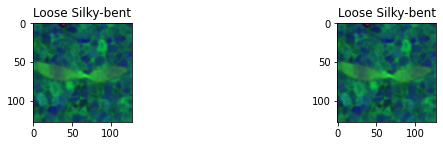

6


In [104]:
fig=plt.figure(figsize=(10,4))
rand_img_num=np.random.randint(1,50)
test_img = test_df.iloc[rand_img_num]
fig.add_subplot(2,2,1)
plt.imshow(X_test[test_img['y_test']])
plt.title(classes[test_img['y_test']])
fig.add_subplot(2,2,2)
plt.imshow(X_test[test_img['y_predict']])
plt.title(classes[test_img['y_predict']])
plt.show()
print(test_img['y_test'])

##### Key takeaways:
- We were able to achieve 80% prediction accuracy using the Model.
- The sample distribution was unbalanced
- Model was able to predict most of the classes correclty but failed to predict **Black-Grass** correclty due to 
    - Similarity with **Loose Silky-bent** which has higest samples 
    - Poor quality of images,
- We tried image Augumentation to improve the modfe but did not give results 
- Adding more images and balancing the distribution can help improve the model further 

In [108]:
%%shell
jupyter nbconvert --to html '/content/drive/MyDrive/Colab Notebooks/plant_seedlings-colab.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/plant_seedlings-colab.ipynb to html
[NbConvertApp] Writing 2604420 bytes to /content/drive/MyDrive/Colab Notebooks/plant_seedlings-colab.html
